In [144]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import math
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('gbm-data.csv')

In [3]:
X = data[data.columns[1:]]
y = data[data.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.2613           57.52s
         2           1.1715           56.30s
         3           1.1009           55.08s
         4           1.0529           54.43s
         5           1.0130           53.95s
         6           0.9740           54.21s
         7           0.9475           53.22s
         8           0.9197           53.09s
         9           0.8979           52.35s
        10           0.8730           52.10s
        20           0.7207           48.96s
        30           0.6055           45.64s
        40           0.5244           43.28s
        50           0.4501           40.93s
        60           0.3908           39.01s
        70           0.3372           37.00s
        80           0.3009           34.97s
        90           0.2603           32.76s
       100           0.2327           30.60s
       200           0.0835           10.02s
LR =  0.2 best iter =  36


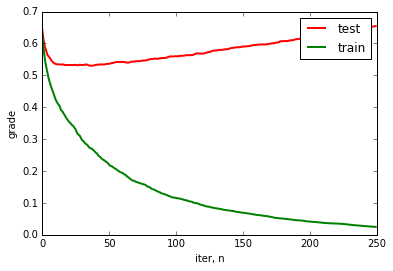

In [153]:
l_rate = [1,0.5, 0.3, 0.2, 0.1]
best_it_all = []
for i in l_rate:
    clf = GradientBoostingClassifier(n_estimators=250, learning_rate=i, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    
    train_pred_iters = clf.staged_predict_proba(X_train)
    test_pred_iters = clf.staged_predict_proba(X_test)  
    
    train_loss = []
    for pred in clf.staged_decision_function(X_train):
        train_loss.append(log_loss(y_train, [1.0/(1.0+math.exp(-x)) for x in pred]))
    
    test_loss = []
    for pred in clf.staged_decision_function(X_test):
        test_loss.append(log_loss(y_test, [1.0/(1.0+math.exp(-x)) for x in pred]))
    
    best_iter = np.where(test_loss == np.min(test_loss))[0][0]
    print 'LR = ', i, 'best iter = ', best_iter
    best_it_all.append(best_iter)
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.xlabel('iter, n')
    plt.ylabel('grade')
    plt.legend(['test', 'train'])
    
    if i == 0.2:
        with open('q2.txt', 'w') as out:
            out.write('%.2f %d' %(test_loss[best_iter],best_iter))

In [152]:
rfCLF = RandomForestClassifier(n_estimators=best_it_all[3], random_state= 241)
rfCLF.fit(X_train, y_train)

predict = rfCLF.predict_proba(X_test)
result = log_loss(y_test, predict)
with open('q3.txt', 'w') as out:
    out.write('%.2f'%result)